## Regression
In supervised machine learning techniques, we build models that could predict a categorical or numerical value. When the models predict a continuous numerical value, the model is said to Regression model.

## Agenda
* Building Regression model manually
* Building Regression model using Scikit Learn

#### Steps in building a model
* Read data
* Feature engineering
* Create a train set and a test set
* Use train set to build the model
* Test the model
* Visualize

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In this notebook, we will consider computers dataset, which contains the details of time taken to repair a computer, given the number of units to be repaired.

### Building Regression model manually

#### <font color='blue'>Read data</font>

In [5]:
computers = pd.read_csv("datasets/computers.csv") # Reading data from input csv file

In [4]:
computers.head() # Printing the first 5 rows

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


#### <font color='blue'>Feature Engineering</font>
Let us get some insights from the data to help us build our model.

In [6]:
# Calculating the mean.
mean_value = computers['Minutes'].mean()

Text(0, 0.5, 'Minutes')

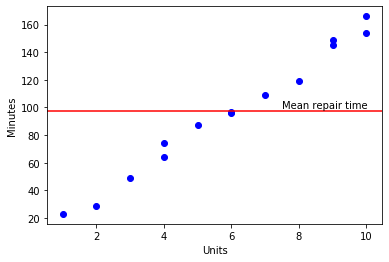

In [7]:
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')

# Plotting the mean
plt.axhline(y=mean_value,c="r")

# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")

#### <font color='blue'>Building model manually</font>
<pre>
Since we have only one predictor, we are going to build a simple linear model.
So, our model will contain a single independant variable.

Hence the model is going to be a simple straight line, with equation y=mx+c
    where x is independant variable (Units),
        y is the dependant variable (Minutes),
        m is the slope of the straight line and
        c is the intercept.
        
Let us consider the straight line that represents the mean value as model0. 
Note that, in the above model slope is 0 (straight line parallel to x-axis). Hence, model0 = 0*x + mean_value
Let us begin with building two more random models and assess their performance.
</pre>

In [7]:
# Creating three Linear Regression models 
minutes_model0 = computers['Minutes'].mean() # Model0: Estimated time = Mean('Minutes')
minutes_model1 = 10 + 12*computers['Units']  # Model1: Estimated time = 10 + 12*(#Units) minutes
minutes_model2 = 6 + 18*computers['Units']   # Model2: Estimated time = 6 + 18*(#Units) minutes

The outcome (predictions) of above models are added to the dataframe for Visualization

In [8]:
computers['min_model0'] = minutes_model0
computers['min_model1'] = minutes_model1
computers['min_model2'] = minutes_model2

#### <font color='blue'>Visualization of Models</font>

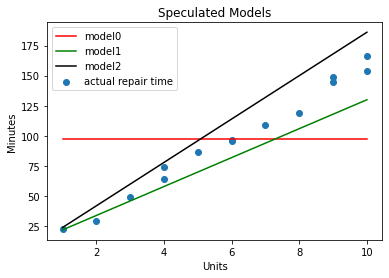

In [9]:
fig,ax = plt.subplots()

# Plotting the actual 'Minutes'
ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')

# Plotting the Model0 predictions
ax.plot(computers['Units'],computers['min_model0'],color="red",label='model0')

# Plotting the Model1 predictions
ax.plot(computers['Units'],computers['min_model1'],color="green",label='model1')

# Plotting the Model2 predictions
ax.plot(computers['Units'],computers['min_model2'],color="black",label='model2')

# Adding xlabel, ylabel, title and legend 
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()


From the above visual, it is observed that, the models are still deviated from the datapoints. The model that would run through most data points would be a better model. So, to build the best model, we need to identy appropriate slope and intercept. Before building the best model, let us evaluate the performance of the models created already.

#### <font color='blue'>Validation of model0</font>

In [10]:
# Validating Model0: Estimated time = mean('Minutes')
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model0, error in prediction by Model0.

model0_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_model0'],
              "Error":(computers['min_model0'] - computers['Minutes'])})

In [11]:
model0_obs # Printing the DataFrame

,Units,Actual time,Predicted time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [12]:
# Sum of errors
sum(model0_obs['Error'])

1.4210854715202004e-14

In [13]:
# Sum of squared errors
sum(model0_obs['Error']**2)

27768.357142857145

#### <font color='blue'>Validation of model1</font>

In [14]:
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model1, error in prediction by Model1.
# Model1: Estimated time = 10 + 12*(#Units) minutes

model1_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_model1,
              "Error":(computers.min_model1 - computers.Minutes)})

In [15]:
model1_obs

,Units,Actual time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [16]:
# SSE for Model1
sum(model1_obs.Error**2)

4993

#### <font color='blue'>Validation of model2</font>

In [17]:
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model2, error in prediction by Model2.
# Model2: Estimated time = 6 + 18*(#Units) minutes

model2_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_model2,
              "Error":(computers.min_model2 - computers.Minutes)})

In [18]:
model2_obs

,Units,Actual time,Predicted time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [19]:
# SSE for Model2
sum(model2_obs.Error**2)

5001

#### <font color='blue'>Bulding best fit model manually</font>
<pre>
To built the best fit model, we need to find the appropriate coefficient and intercept values, such that the sum of the squared regression error becomes zero. We use differential calculus to find the same.

Using differntial calculus, we would arrive at
    m= (sum(x*y) - n*mean(x)*mean(y)) / (sum(x**2) - n*(mean(x)**2))
    c= mean(y) - (m * mean(x))
        where x is the predictor values
            y is the actual target values
            n is the sample size

</pre>

In [20]:
x = computers.Units
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  4.161654135338296  coefficient :  15.508771929824569


In [21]:
min_best_fit_model = c + m*computers.Units
computers['min_best_fit_model'] = min_best_fit_model

#### <font color='blue'>Visualization of Best fit Model</font>

In [22]:
# Printing the values predicted by the best fit model
computers[["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best fit model line')

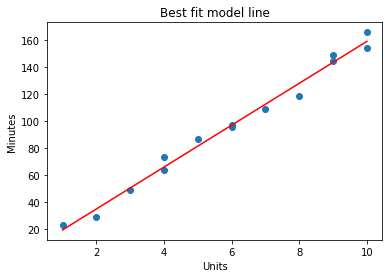

In [23]:
fig,ax = plt.subplots()
ax.scatter(x="Units",y="Minutes",data=computers)
ax.plot(computers.Units,computers.min_best_fit_model,color="red")
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")

#### <font color='blue'>Validation of best fit model</font>

In [24]:
# Computing the SSE for the best fit model

best_fit_model_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_best_fit_model,
              "Error":computers.min_best_fit_model - computers.Minutes})

best_fit_model_obs

,Units,Actual time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [25]:
# SSE for the best fit model
sum(best_fit_model_obs.Error**2)

348.848370927318

### Building Regression model using Scikit-Learn Library

In [26]:
# Importing the required class
from sklearn.linear_model import LinearRegression

# Setting the 'Units' column as the input data or predictor column
X = computers[['Units']]

# Setting the 'Minutes' column as the output data or target column
y=computers['Minutes']

In [27]:
# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the data i.e. building the model
model.fit(X, y)

# Fetching intercept (b0) and coefficient (b1)
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4.161654135338296
Coefficients: [15.50877193]


## Coefficient of Determination

In [28]:
SST = sum((computers.Minutes.mean() - computers.Minutes)**2)
SST

27768.357142857145

In [29]:
SSE = sum(best_fit_model_obs.Error**2)
SSE

348.848370927318

In [30]:
SSR = SST - SSE
SSR

27419.508771929828

In [31]:
Rsq = SSR/SST
Rsq

0.9874371980620736

In [32]:
# Setting the 'Units' column as the input data or predictor column
X = computers[['Units']]

# Setting the 'Minutes' column as the output data or target column
y=computers['Minutes']

In [33]:
Rsq1 = model.score(computers[["Units"]],y)
Rsq1

0.9874371980620736

In [34]:
np.corrcoef(computers["Units"],y)

array([[1.        , 0.99369875],
       [0.99369875, 1.        ]])